In [1]:
# Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Plot Design Settings
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Blues_d')

plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)


# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\willc\Documents\Project\Project\city_temperature.csv')
data.shape

(2906327, 8)

In [5]:
data.head()

#showing me the names of the columns in the dataset

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [6]:
data.info()

#showing me the data types for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [7]:
data['AvgTemperature'].describe()

count    2.906327e+06
mean     5.600492e+01
std      3.212359e+01
min     -9.900000e+01
25%      4.580000e+01
50%      6.250000e+01
75%      7.550000e+01
max      1.100000e+02
Name: AvgTemperature, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [10]:
data['Month_2'] = data.loc[:, 'Month']

In [11]:
data.head()

Region  Country State     City  Month  Day  Year  AvgTemperature  Month_2
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2        1
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4        1
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8        1
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4        1
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9        1

In [16]:
# Number of unique values in each variable
for var in data:
    print(var, ': ', data[var].nunique())

Region :  7
Country :  125
State :  52
City :  321
Month :  12
Day :  32
Year :  28
AvgTemperature :  1517
Month_2 :  12


In [17]:
print('Number of Duplicates: {}'.format(len(data[data.duplicated()])))

Number of Duplicates: 20715


In [18]:
data = data.drop_duplicates()

In [19]:
#Using a groupby to show number of errors in year entry

data.groupby('Year')['AvgTemperature'].count()

Year
200         60
201        235
1995    117886
1996    118218
1997    117926
1998    118352
1999    118625
2000    118950
2001    118625
2002    118625
2003    118410
2004    117913
2005    117165
2006    116917
2007    114685
2008    113831
2009    113517
2010    114533
2011    112313
2012    111261
2013    110291
2014    108288
2015    106768
2016    106505
2017    106216
2018    105660
2019    105295
2020     38542
Name: AvgTemperature, dtype: int64

In [20]:
#the years listed as '200' and '201' are probably acidents, so lets just get rid of them

data = data[data['Year']>1994]
data = data[data['Year']<2020]

In [21]:
print('Day Range Min to Max: \n{}'.format(data['Day'].agg([min , max])))

Day Range Min to Max: 
min     0
max    31
Name: Day, dtype: int64


In [22]:
data = data[data['Day']>0]
print('1st Day: \n{}'.format(data['Day'].agg([min]))) 

1st Day: 
min    1
Name: Day, dtype: int64


In [23]:
days_in_year = data.groupby(['Year', 'Country'])['Day'].transform('size')

In [25]:
print('Coldest and hottest temperatures: \n{}'.format(data['AvgTemperature'].agg([min , max])))

Coldest and hottest temperatures: 
min    -99.0
max    110.0
Name: AvgTemperature, dtype: float64


In [26]:
data = data[data['AvgTemperature']>-98]
print('Coldest and hottest temperatures: \n{}'.format(data['AvgTemperature'].agg([min]))) 

Coldest and hottest temperatures: 
min   -50.0
Name: AvgTemperature, dtype: float64


In [27]:
data['AvgTemperature'] = (data['AvgTemperature'] -32)*(5/9)

In [28]:
data

Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  Month_2  
0            1    1  1995       17.888889        1  
1            1    2  1995        9.666667        1  
2            1    3  1995        9.333333        1  
3            1    4  1995        8.000000        1  
4            1    5  1995        8.833333        1  
...        ...  ...   ...             ...      ...  
2906322      7   27  2013       28.000000        7  
2906323      7   28  2013       27.555556        7  
2906324      7   29  2013       29.000000        7  
2906325      7   30  2013       28.777778        7  
2906326      7   31  2013       28.666667        7  

[2767895 rows x 9 columns]

In [29]:
plt.figure(figsize=(20,7))
plt.title("Average Temperature of the World by year")
sns.lineplot(data=data, x='Year', y='AvgTemperature', lw=2)
plt.show() 

In [30]:
before = np.round(data['AvgTemperature'][data['Year']==1995].mean(), decimals=2)
after = np.round(data['AvgTemperature'][data['Year']==2019].mean(), decimals=2)
percent = np.round(after-before, decimals=2)

print(f'Average World Temperature in 1995 is {before}\N{DEGREE SIGN}, and {after}\N{DEGREE SIGN} in 2019,\n and the temperature difference over this time period is {percent}\N{DEGREE SIGN} celcius')

Average World Temperature in 1995 is 15.24°, and 16.18° in 2019,
 and the temperature difference over this time period is 0.94° celcius


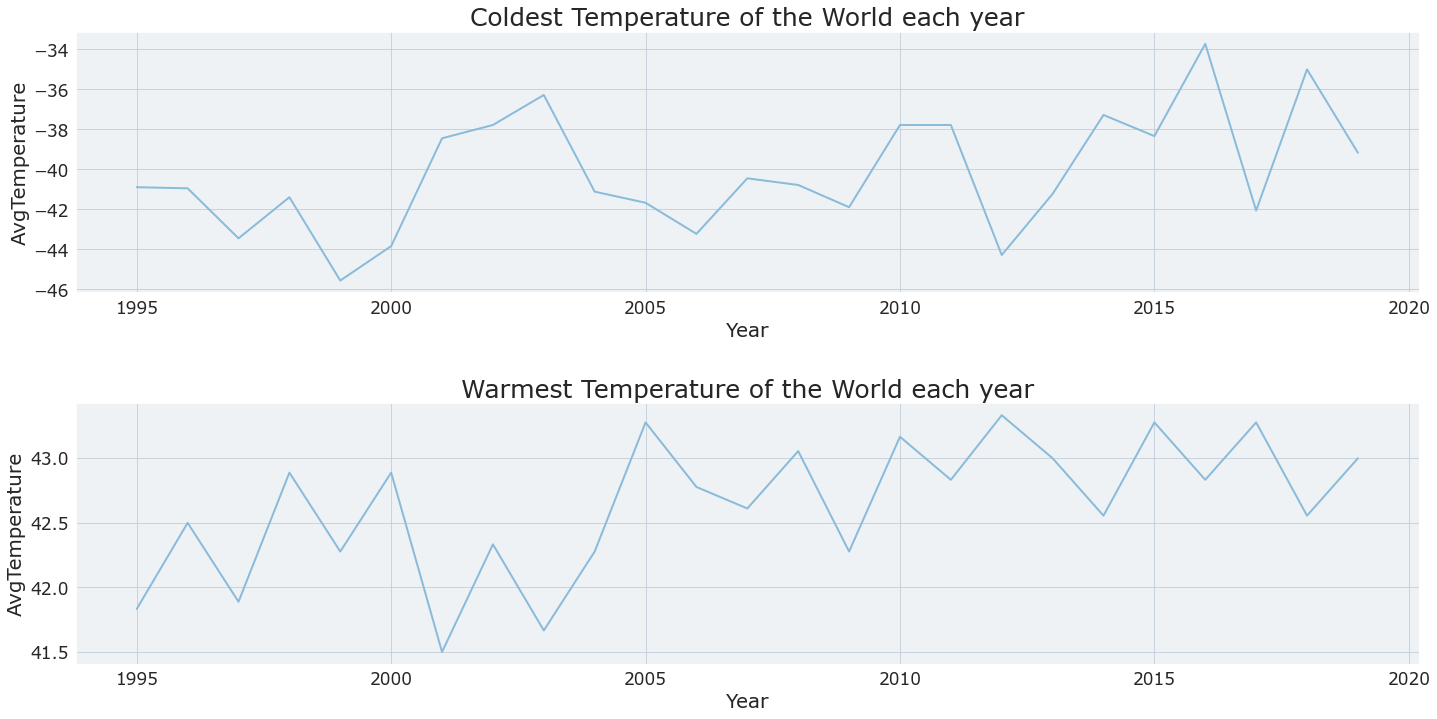

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(20,10))

# Hottest world temperature
warmest = data.groupby(['Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
sns.lineplot(data=warmest, x='Year', y='AvgTemperature', lw=2, ax=axes[1]).set_title('Warmest Temperature of the World each year')

# Coldest world temperature
coldest = data.groupby(['Year'])['AvgTemperature'].min().reset_index().sort_values(by='AvgTemperature',ascending=False)
sns.lineplot(data=coldest, x='Year', y='AvgTemperature', lw=2, ax=axes[0]).set_title('Coldest Temperature of the World each year')

plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

In [32]:
# Increase in warmest temperature
warmest = data.groupby(['Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
before_w = np.round(warmest['AvgTemperature'][warmest['Year']==1995].mean(), decimals=2)
after_w = np.round(warmest['AvgTemperature'][warmest['Year']==2019].mean(), decimals=2)
percent_w = np.round(after_w-before_w, decimals=2)

# Increase in coldest temperature
coldest = data.groupby(['Year'])['AvgTemperature'].min().reset_index().sort_values(by='AvgTemperature',ascending=False)
before_c = np.round(coldest['AvgTemperature'][coldest['Year']==1995].mean(), decimals=2)
after_c = np.round(coldest['AvgTemperature'][coldest['Year']==2019].mean(), decimals=2)
percent_c = np.round(after_c-before_c, decimals=2)


print(f'Hottest World Temperature in 1995 was {before_w}\N{DEGREE SIGN}, and {after_w}\N{DEGREE SIGN} in 2019,\n and the temperature difference over this time period is {percent_w}\N{DEGREE SIGN} celcius \n')

print(f'Coldest World Temperature in 1995 was {before_c}\N{DEGREE SIGN}, and {after_c}\N{DEGREE SIGN} in 2019,\n and the temperature difference over this time period is {percent_c}\N{DEGREE SIGN} celcius')

Hottest World Temperature in 1995 was 41.83°, and 43.0° in 2019,
 and the temperature difference over this time period is 1.17° celcius 

Coldest World Temperature in 1995 was -40.89°, and -39.17° in 2019,
 and the temperature difference over this time period is 1.72° celcius


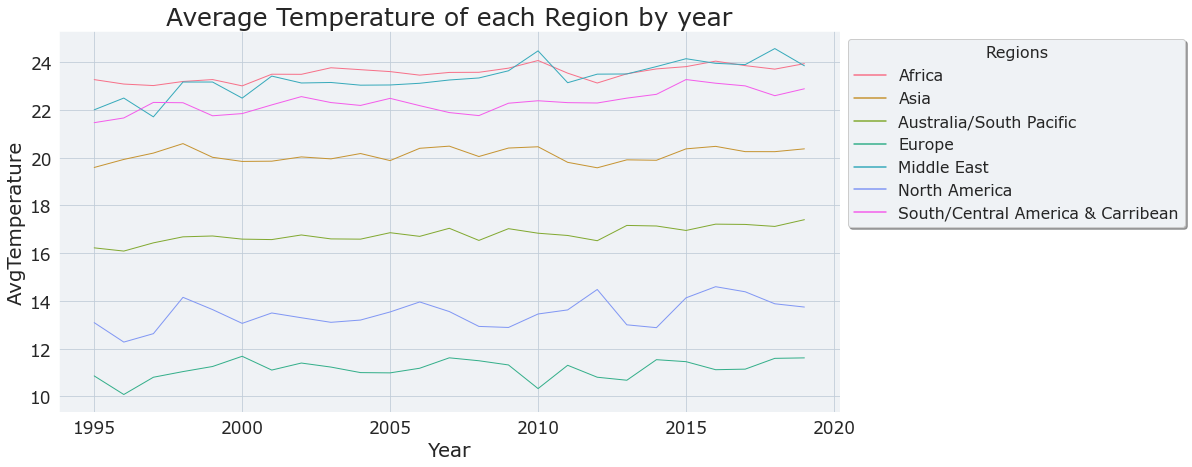

In [33]:
temp_data = data[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()

plt.figure(figsize=(14,7))
plt.title("Average Temperature of each Region by year")
sns.lineplot(x='Year', y='AvgTemperature', hue='Region',
 units='Region',markers=True, dashes=False ,estimator=None, lw=1,data=temp_data)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, fontsize='small', title='Regions', title_fontsize = "16")
plt.show()

In [35]:
regions = data['Region'].unique()

for region in regions:
    overall = np.round(data['AvgTemperature'][data['Region']==region].mean(), decimals=2)
    
    print(f'{region}\'s Average Temperature Over the whole time period is {overall}\N{DEGREE SIGN} celsius \n')

Africa's Average Temperature Over the whole time period is 23.55° celsius 

Asia's Average Temperature Over the whole time period is 20.11° celsius 

Australia/South Pacific's Average Temperature Over the whole time period is 16.79° celsius 

Europe's Average Temperature Over the whole time period is 11.14° celsius 

Middle East's Average Temperature Over the whole time period is 23.32° celsius 

North America's Average Temperature Over the whole time period is 13.47° celsius 

South/Central America & Carribean's Average Temperature Over the whole time period is 22.32° celsius 



In [36]:
regions = data['Region'].unique()

for region in regions:
    before = np.round(data['AvgTemperature'][data['Region']==region][data['Year']==1995].mean(), decimals=2)
    after = np.round(data['AvgTemperature'][data['Region']==region][data['Year']==2019].mean(), decimals=2)
    percent = np.round(after-before, decimals=2)

    print(f'{region}\'s Average Temperature in 1995 was {before}\N{DEGREE SIGN} and {after}\N{DEGREE SIGN} in 2019,\n and the temperature difference is {percent}\N{DEGREE SIGN} celsius \n')

Africa's Average Temperature in 1995 was 23.27° and 23.94° in 2019,
 and the temperature difference is 0.67° celsius 

Asia's Average Temperature in 1995 was 19.59° and 20.37° in 2019,
 and the temperature difference is 0.78° celsius 

Australia/South Pacific's Average Temperature in 1995 was 16.22° and 17.4° in 2019,
 and the temperature difference is 1.18° celsius 

Europe's Average Temperature in 1995 was 10.86° and 11.61° in 2019,
 and the temperature difference is 0.75° celsius 

Middle East's Average Temperature in 1995 was 22.01° and 23.85° in 2019,
 and the temperature difference is 1.84° celsius 

North America's Average Temperature in 1995 was 13.09° and 13.74° in 2019,
 and the temperature difference is 0.65° celsius 

South/Central America & Carribean's Average Temperature in 1995 was 21.47° and 22.89° in 2019,
 and the temperature difference is 1.42° celsius 



In [37]:
fig, ax = plt.subplots(4, 2, figsize = (20, 18))

    
# Grouping all Region Names
regions = data['Region'].unique()
    
# Average Monthly Temp of each Region
for idx, (region, axes) in list(enumerate(zip(regions, ax.flatten()))):
        
    region_name = data[data['Region']==region]
    temp_data = region_name.groupby(['Month'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
    sns.barplot(ax=axes,data=temp_data, x='Month', y='AvgTemperature', palette="Blues_d").set_title(region)
        
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

<Figure size 864x864 with 0 Axes>

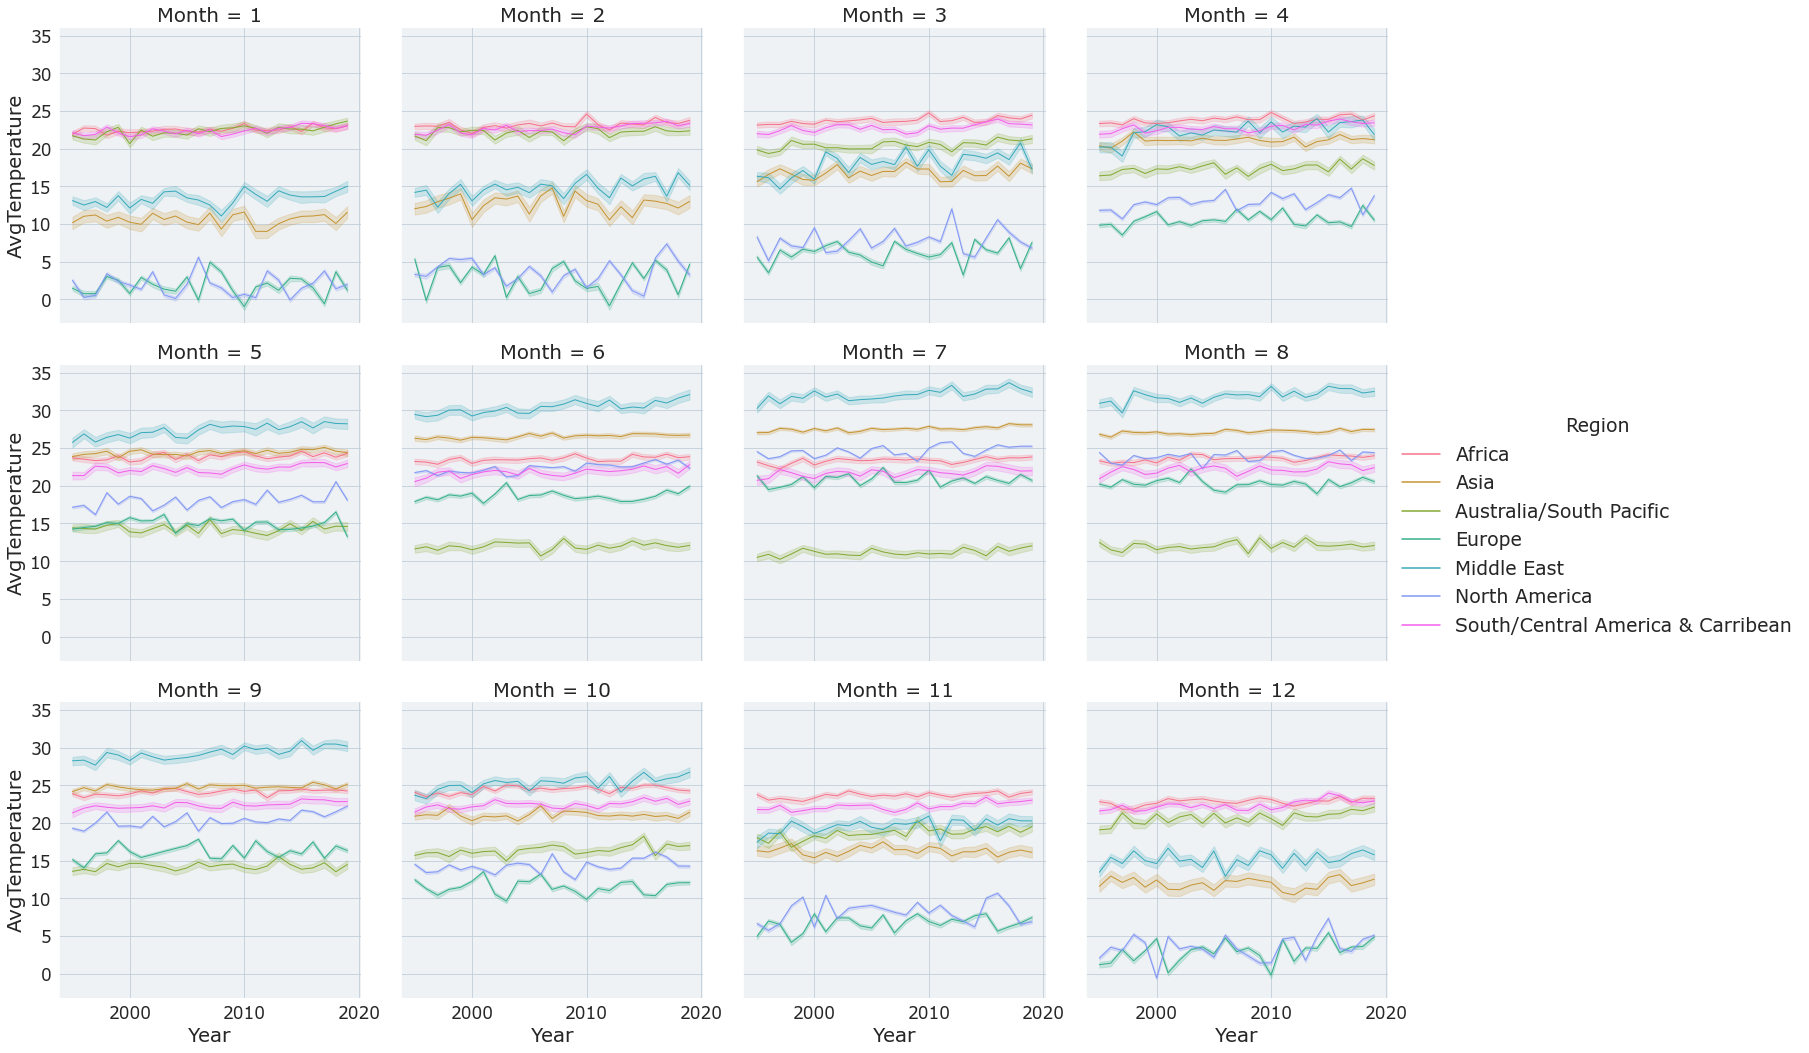

In [38]:
#Average temp for each month by year


plt.figure(figsize = (12, 12))
sns.relplot(data=data, x='Year', y='AvgTemperature', hue='Region', col='Month',kind='line', col_wrap=4, linewidth=1)
plt.show()

In [55]:
temp_data = data[['Country', 'Year', 'AvgTemperature']].groupby(['Country','Year']).mean().reset_index()

px.choropleth(data_frame=temp_data, locations="Country", locationmode='country names', animation_frame="Year",
              color='AvgTemperature', color_continuous_scale=["blue", "green", "red"],     #'Bluered',
              title="Average Temperature of each country from 1995 to 2019")

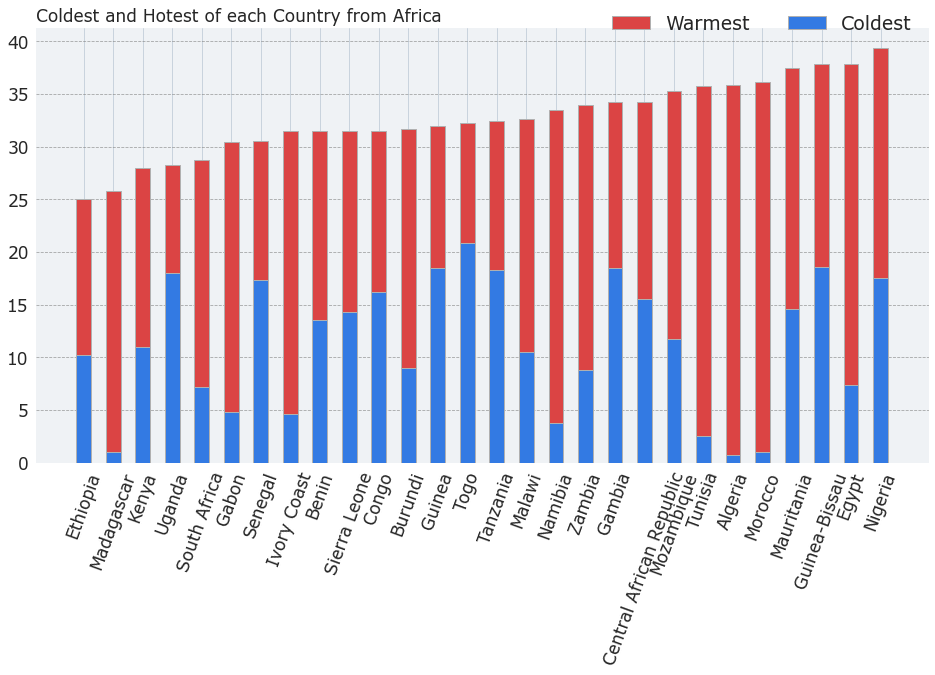

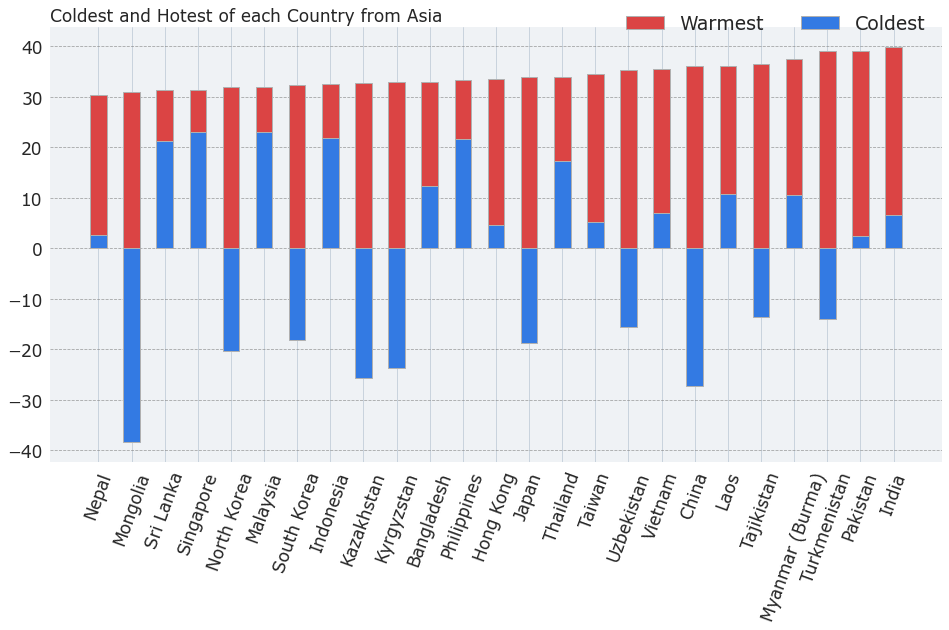

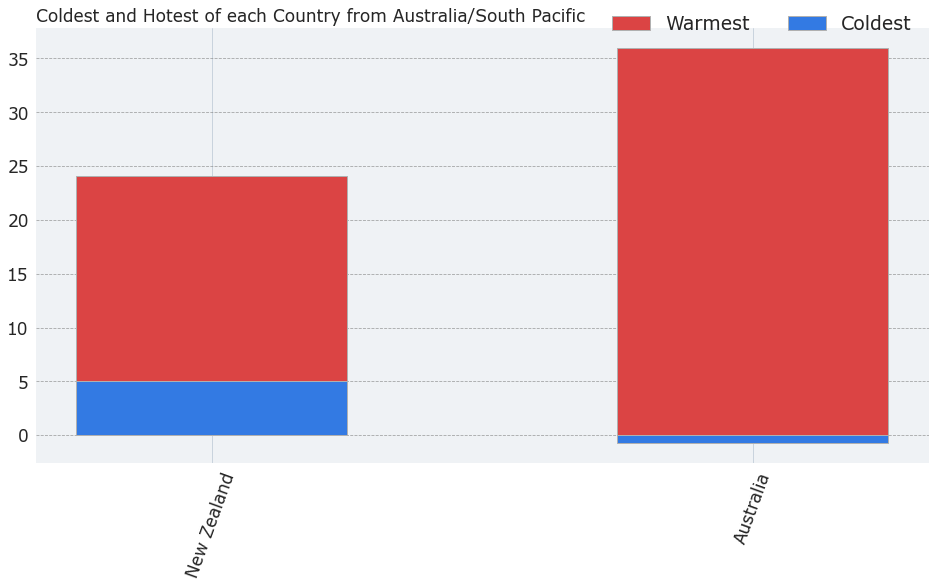

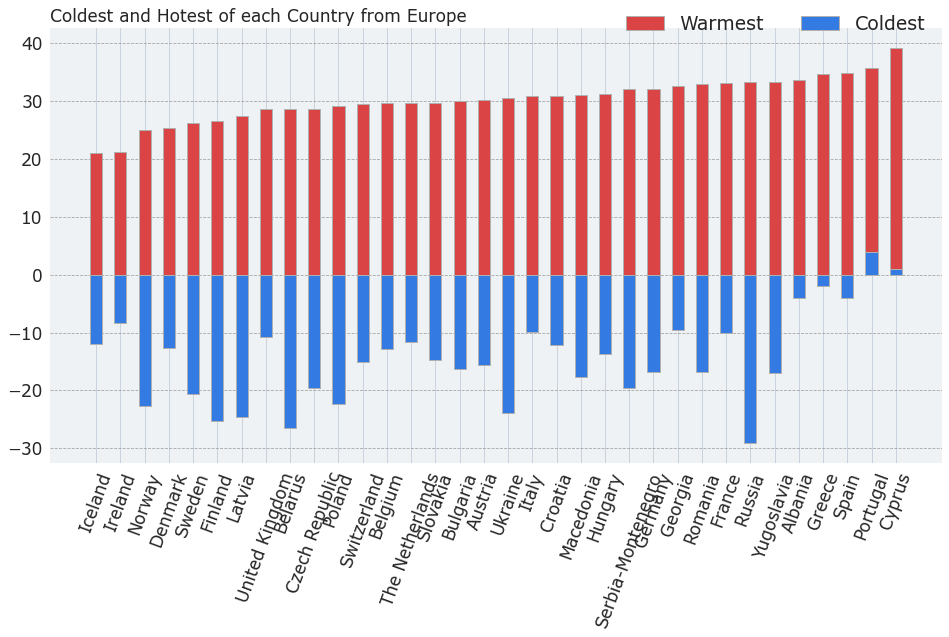

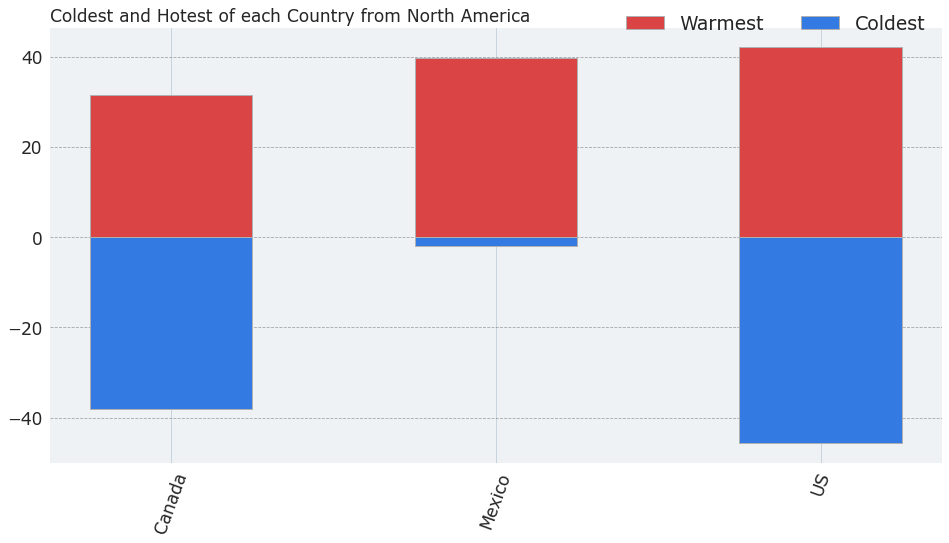

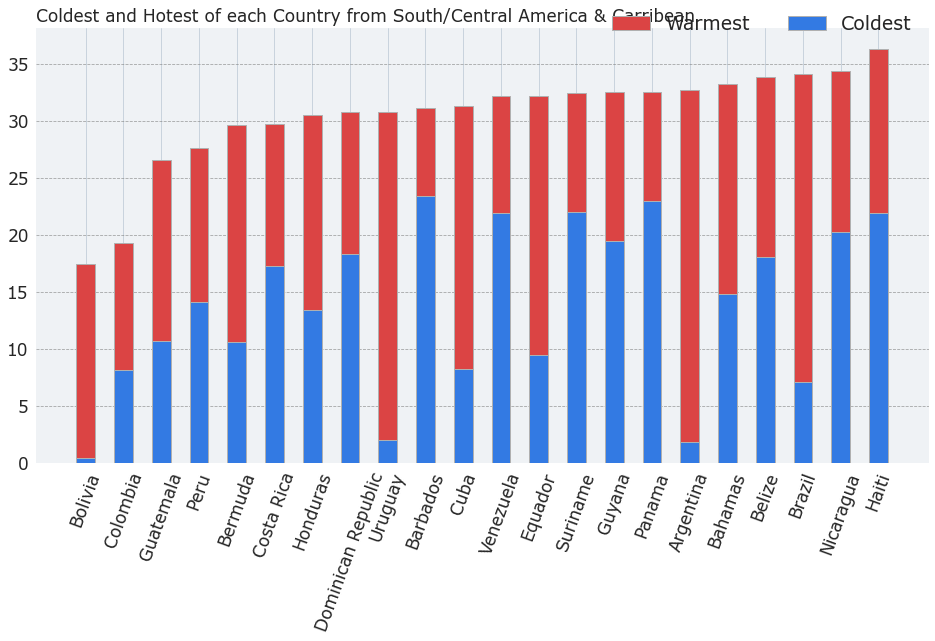

In [40]:
regions = data['Region'].unique()
    
# Create Stacked Bar Plot showing both the coldest and warmest each country has been in each region
for region in regions:
    
# Finding The Min and Max of each Country in each Region
region_name = data[data['Region']==region]
coldest = region_name.groupby(['Country'])['AvgTemperature'].min().reset_index().sort_values(by='AvgTemperature',ascending=True)
warmest = region_name.groupby(['Country'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=True)
    
# Converting back to Dataframe
coldest_data = pd.DataFrame(coldest)
warmest_data = pd.DataFrame(warmest)
    
# Plotting
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(warmest_data['Country'], warmest_data['AvgTemperature'], color='#DB4444', width=0.5)
plt.bar(coldest_data['Country'], coldest_data['AvgTemperature'], color='#337AE3', width=0.5)
    
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# title and legend
legend_label = ['Warmest', 'Coldest']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.07, 0, 0]), frameon = False)
plt.xticks(rotation='70')
plt.title(f'Coldest and Hottest of each Country from {region}', loc='left', fontsize=17)
plt.show()

In [41]:
#Cities with the warmest temperature

fig, ax = plt.subplots(4, 2, figsize = (21, 20))

# Grouping all Region Names
regions = data['Region'].unique()
    
    
# Average Monthly Temp of each Region
for idx, (region, axes) in list(enumerate(zip(regions, ax.flatten()))):
                
    region_name = data[data['Region']==region]
    warmest = region_name.groupby(['City'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False).head(15)
    sns.barplot(ax=axes, data=warmest, x='AvgTemperature', y='City', palette="Reds_d").set_title(region)
        
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

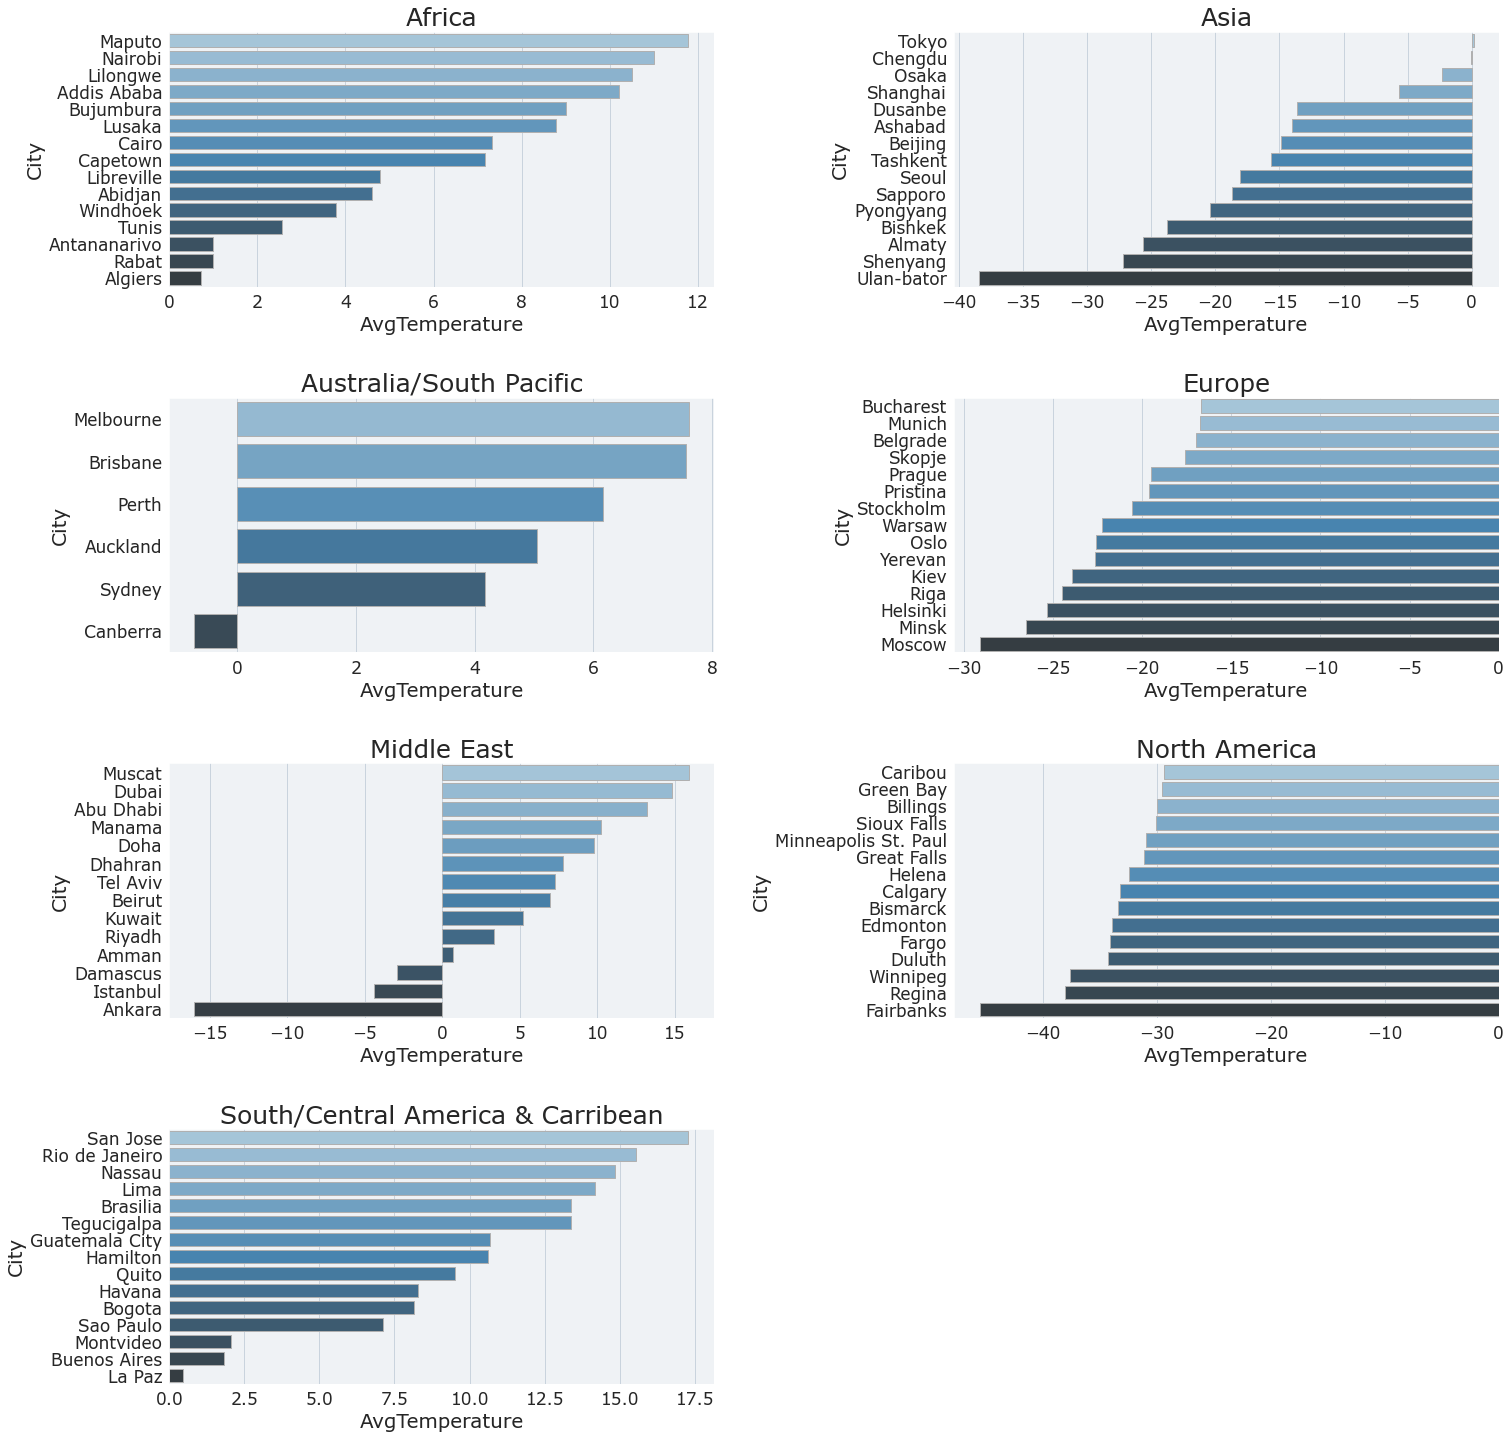

In [42]:
fig, ax = plt.subplots(4, 2, figsize = (21, 20))

    
# Grouping all Region Names
regions = data['Region'].unique()
    
# Average Monthly Temp of each Region
for idx, (region, axes) in list(enumerate(zip(regions, ax.flatten()))):
        
    region_name = data[data['Region']==region]
    coldest = region_name.groupby(['City'])['AvgTemperature'].min().reset_index().sort_values(by='AvgTemperature',ascending=False).tail(15)
    sns.barplot(ax=axes, data=coldest, x='AvgTemperature', y='City', palette="Blues_d").set_title(region)
        
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

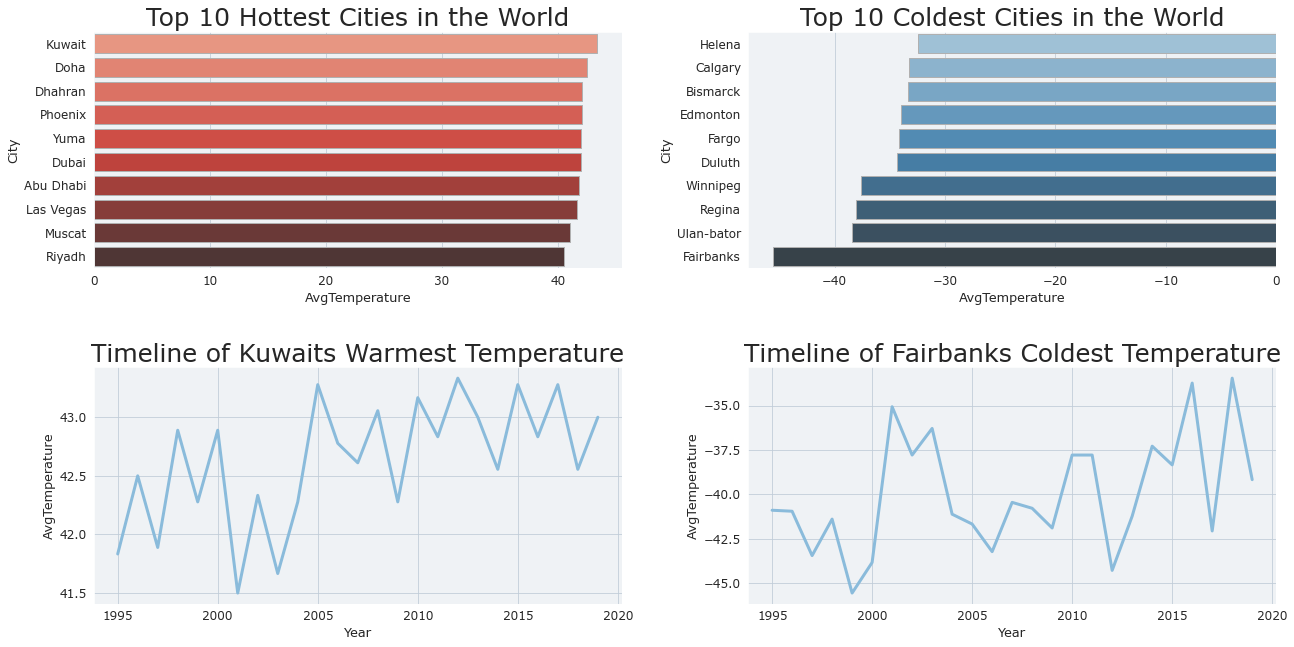

In [49]:
with plt.rc_context(rc = {'axes.labelsize': 13, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'axes.titlesize': 16}): 
    fig, ax = plt.subplots(2, 2, figsize = (18, 9))

    ax_flat = ax.flatten()
    
# Grouping all Region Names. Otherwise, there will be multiple listings for each region.
regions = data['Region'].unique()
    
    
# 1st Graph - Top 10 Hottest Cities in the world
first_g = data.groupby(['City'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False).head(10)
sns.barplot(ax=ax_flat[0], data=first_g, x='AvgTemperature', y='City',
                palette='Reds_d').set_title('Top 10 Hottest Cities in the World')

    
# 2nd Graph - Top 10 Coldest Cities in the world
second_g = data.groupby(['City'])['AvgTemperature'].min().reset_index().sort_values(by='AvgTemperature',ascending=False).tail(10)
sns.barplot(ax=ax_flat[1], data=second_g, x='AvgTemperature', y='City',
                palette='Blues_d').set_title('Top 10 Coldest Cities in the World')
# 3rd Graph - Coldest Temp of the Warmest City over the years
third_g = data[data['City']=='Kuwait']
third_g = third_g[['City', 'AvgTemperature', 'Year']].groupby(['Year']).max()
sns.lineplot(ax=ax_flat[2], data=third_g, x='Year', y='AvgTemperature', markers=True,
                dashes=False,estimator=None, lw=3).set_title('Timeline of Kuwaits Warmest Temperature')
    
    
# 4th Graph - Coldest Temp of the Coldest City over the years
fourth_g = data[data['City']=='Fairbanks']
fourth_g = fourth_g[['City', 'AvgTemperature', 'Year']].groupby(['Year']).min()
sns.lineplot(ax=ax_flat[3], data=fourth_g, x='Year', y='AvgTemperature', markers=True,
    dashes=False ,estimator=None, lw=3).set_title('Timeline of Fairbanks Coldest Temperature')

    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()
    

In [44]:
#GroupBy 

In [51]:
#Grouping the data by highest recorded temperature. Notice how they mostly 
#   happen in the most recent year of the recorded data.

data.groupby(['AvgTemperature']).min()

Region Country       City  Month  Day  Year  Month_2
AvgTemperature                                                             
-45.555556      North America      US  Fairbanks     12   31  1999       12
-45.055556      North America      US  Fairbanks      2    5  1999        2
-44.277778      North America      US  Fairbanks      1   29  2012        1
-43.833333      North America      US  Fairbanks      1    1  2000        1
-43.444444      North America      US  Fairbanks      1    5  1997        1
...                       ...     ...        ...    ...  ...   ...      ...
 43.055556        Middle East  Kuwait     Kuwait      7   26  2008        7
 43.166667        Middle East  Kuwait     Kuwait      6   15  2010        6
 43.222222        Middle East  Kuwait     Kuwait      7   25  2017        7
 43.277778        Middle East  Kuwait     Kuwait      6    2  2005        6
 43.333333        Middle East  Kuwait     Kuwait      8    1  2012        8

[1514 rows x 7 columns]

In [53]:
data.shape

(2767895, 9)